# Project Overview

### Fake News Detection using NLP & Bi-LSTM

The objective of this project is to build a machine learning model that classifies news articles as real or fake based on textual patterns.

The model uses Natural Language Processing (NLP) techniques and a Bidirectional LSTM neural network to learn linguistic differences between real and fake news articles.

# Problem Statement

Fake news spreads rapidly across digital platforms and can influence public opinion.

This project aims to detect fake news articles using supervised learning and deep learning–based text classification.

# Dataset Description

Two datasets:

1. Real news dataset

2. Fake news dataset

Each article contains:

1. title

2. text

3. subject

4. date

A target column 'isfake' is created:

0 → Real

1 → Fake

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import re
import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    LSTM,
    Bidirectional,
    Dense,
    Dropout,
    SpatialDropout1D,
    GlobalMaxPooling1D
)
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random

# Reading data

In [2]:
# 'df_true' represents real news.
df_true = pd.read_csv(r'C:\Users\vighn\Desktop\jupyter\Fake News Detection\Dataset\True.csv')

In [3]:
df_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_true.tail(5)

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
# 'df_fake' represents fake news.
df_fake = pd.read_csv(r'C:\Users\vighn\Desktop\jupyter\Fake News Detection\Dataset\Fake.csv')

In [9]:
df_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [10]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
df_fake.tail(5)

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [12]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [13]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### Checking for NULL's

In [14]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

# Feature Construction

In [16]:
# Adding a target class column to indicate whether the news is real or fake

In [17]:
df_true['isfake'] = 0
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [18]:
df_fake['isfake'] = 1
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [19]:
# concatenate Real and Fake News
df = pd.concat([df_true, df_fake], axis=0)

In [20]:
df.columns

Index(['title', 'text', 'subject', 'date', 'isfake'], dtype='object')

In [21]:
# combine title and text together
df['content'] = (df['title'] + " " + df["text"])

In [22]:
df['content'][0]

0    As U.S. budget fight looms, Republicans flip t...
0     Donald Trump Sends Out Embarrassing New Year’...
Name: content, dtype: object

In [23]:
df.columns

Index(['title', 'text', 'subject', 'date', 'isfake', 'content'], dtype='object')

# Text Preprocessing

In [24]:
stop_words = set(stopwords.words("english"))

In [25]:
def clean_text(text):
    text = text.lower()                                                   # Convert everything to lowercase
    text = re.sub(r"http\S+", "", text)                                   # Remove URL's

    # remove publisher leakage
    text = re.sub(
        r"\b(reuters|ap|bbc|cnn|washington|report|reported|said)\b",
        "",
        text
    )
    
    text = re.sub(r"\d+", "", text)                                       # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))      # Remove punctuation

    words = text.split()                                                  # Tokenization (split into words)
    words = [w for w in words if w not in stop_words]                     # Remove stopwords

    return " ".join(words)

In [26]:
# Applying function to Dataframe
df['clean_text'] = df['content'].astype(str).apply(clean_text)

In [27]:
# Show cleaned up news after removing stopwords
df['clean_text'][0]

0    us budget fight looms republicans flip fiscal ...
0    donald trump sends embarrassing new year’s eve...
Name: clean_text, dtype: object

In [28]:
df.columns

Index(['title', 'text', 'subject', 'date', 'isfake', 'content', 'clean_text'], dtype='object')

In [29]:
type(df['clean_text'].iloc[0])

str

In [30]:
# join the words into a string
df["clean_joined"] = df["clean_text"].apply(lambda x: " ".join(x))

In [31]:
df["clean_joined"][0]

0    u s   b u d g e t   f i g h t   l o o m s   r ...
0    d o n a l d   t r u m p   s e n d s   e m b a ...
Name: clean_joined, dtype: object

In [32]:
df.columns

Index(['title', 'text', 'subject', 'date', 'isfake', 'content', 'clean_text',
       'clean_joined'],
      dtype='object')

In [33]:
# Dropping duplicates
print("Before:", len(df))

df = df.drop_duplicates(subset="clean_joined")

print("After:", len(df))

df = df.reset_index(drop=True)

Before: 44898
After: 39095


In [34]:
# Shuffle dataset before split
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [35]:
# Splitting the data
X = df["clean_joined"]
y = df["isfake"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Checking for data leakage via text overlap
overlap = set(X_train).intersection(set(X_test))
print("Overlap:", len(overlap))

Overlap: 0


### Since overlap is '0', we can conclude that there is no data leakage.

# Visualize cleaned up dataset

<Axes: xlabel='count', ylabel='subject'>

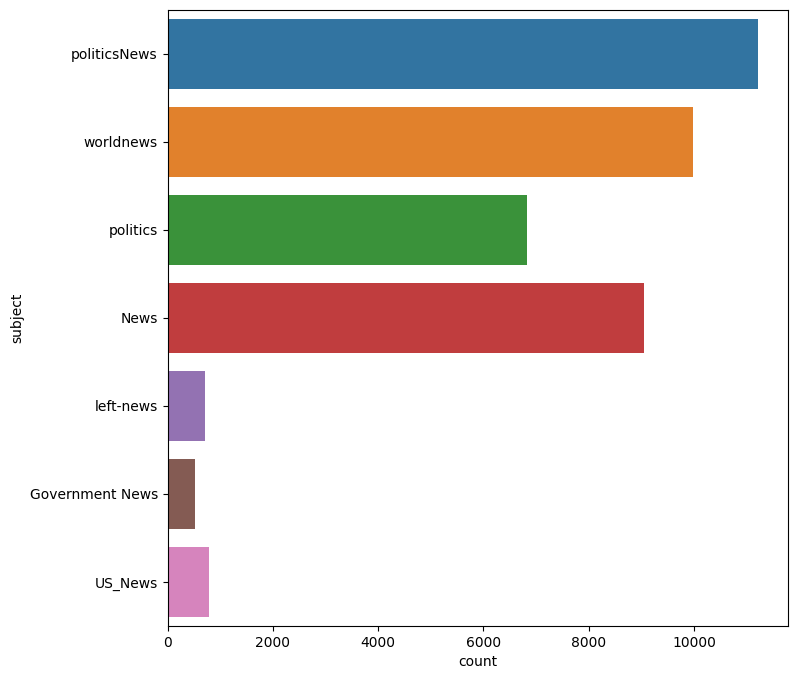

In [36]:
# Plot 1: Number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = 'subject', data = df)

<Axes: xlabel='count', ylabel='isfake'>

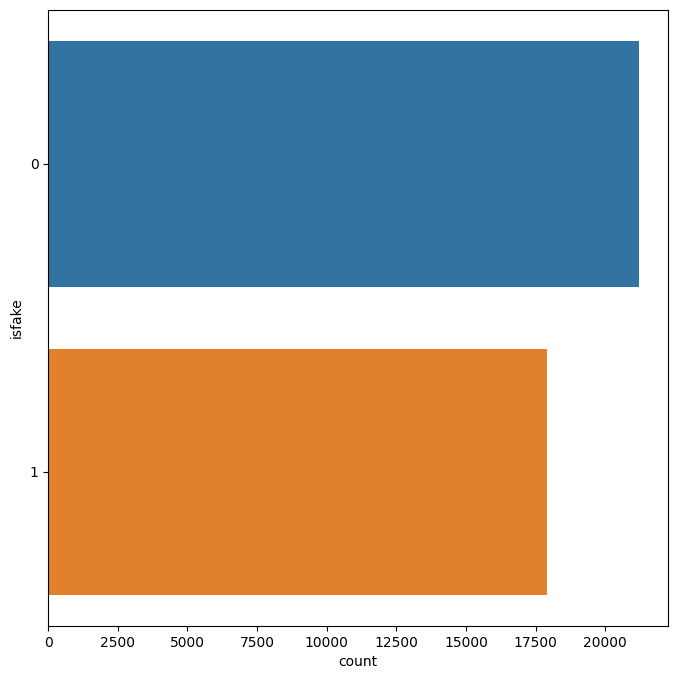

In [37]:
# Plot 2: Count plot for fake vs. true news
plt.figure(figsize = (8, 8))
sns.countplot(y = 'isfake', data = df)

(-0.5, 1599.5, 799.5, -0.5)

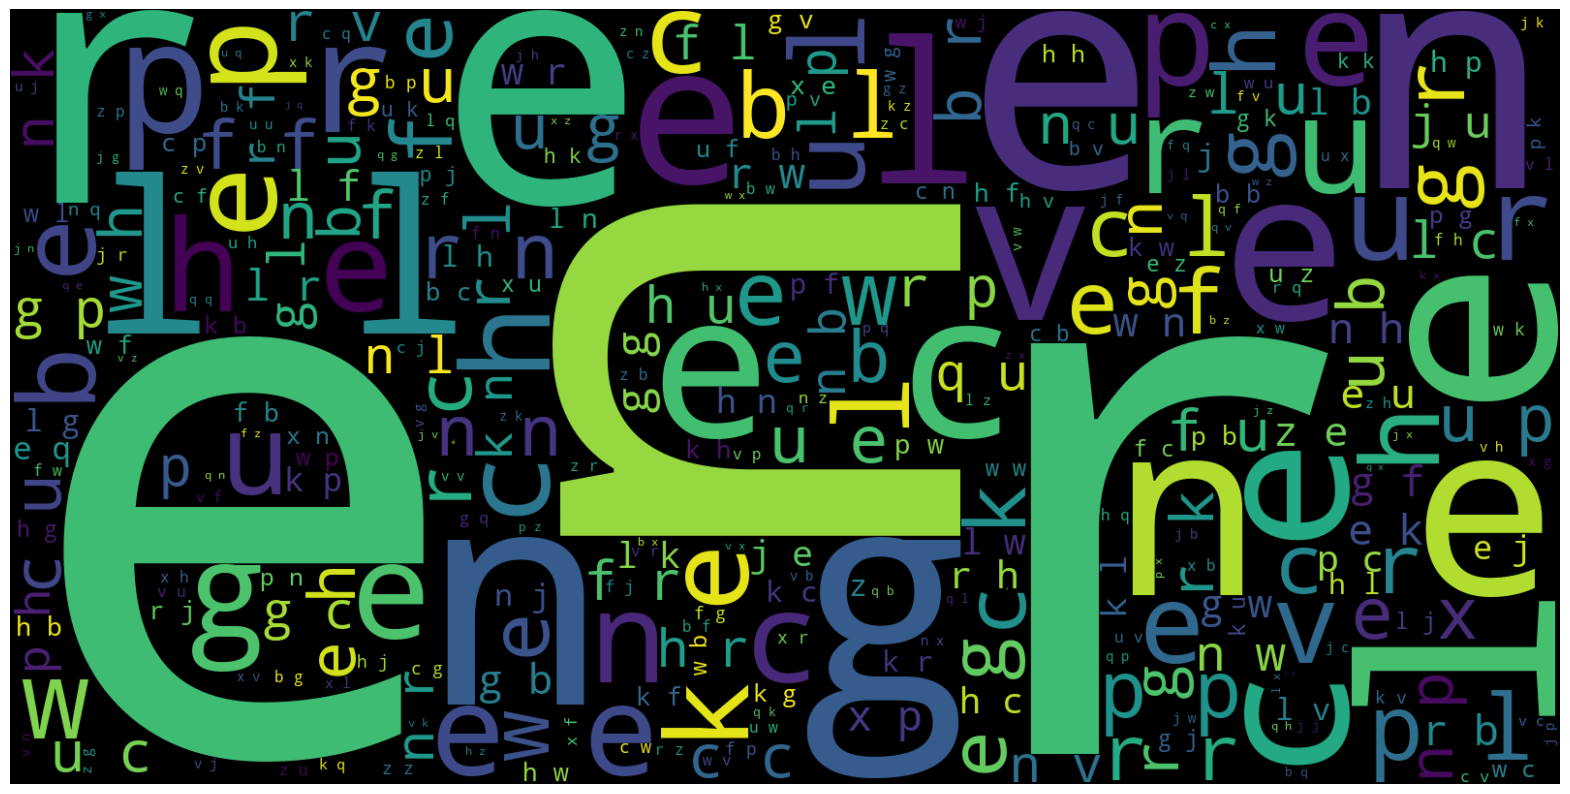

In [38]:
# Plot 3: Word cloud for text that is 'Fake'
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(' '.join(df[df.isfake == 1].clean_joined.astype(str)))
plt.imshow(np.array(wc.to_image()), interpolation="bilinear")
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

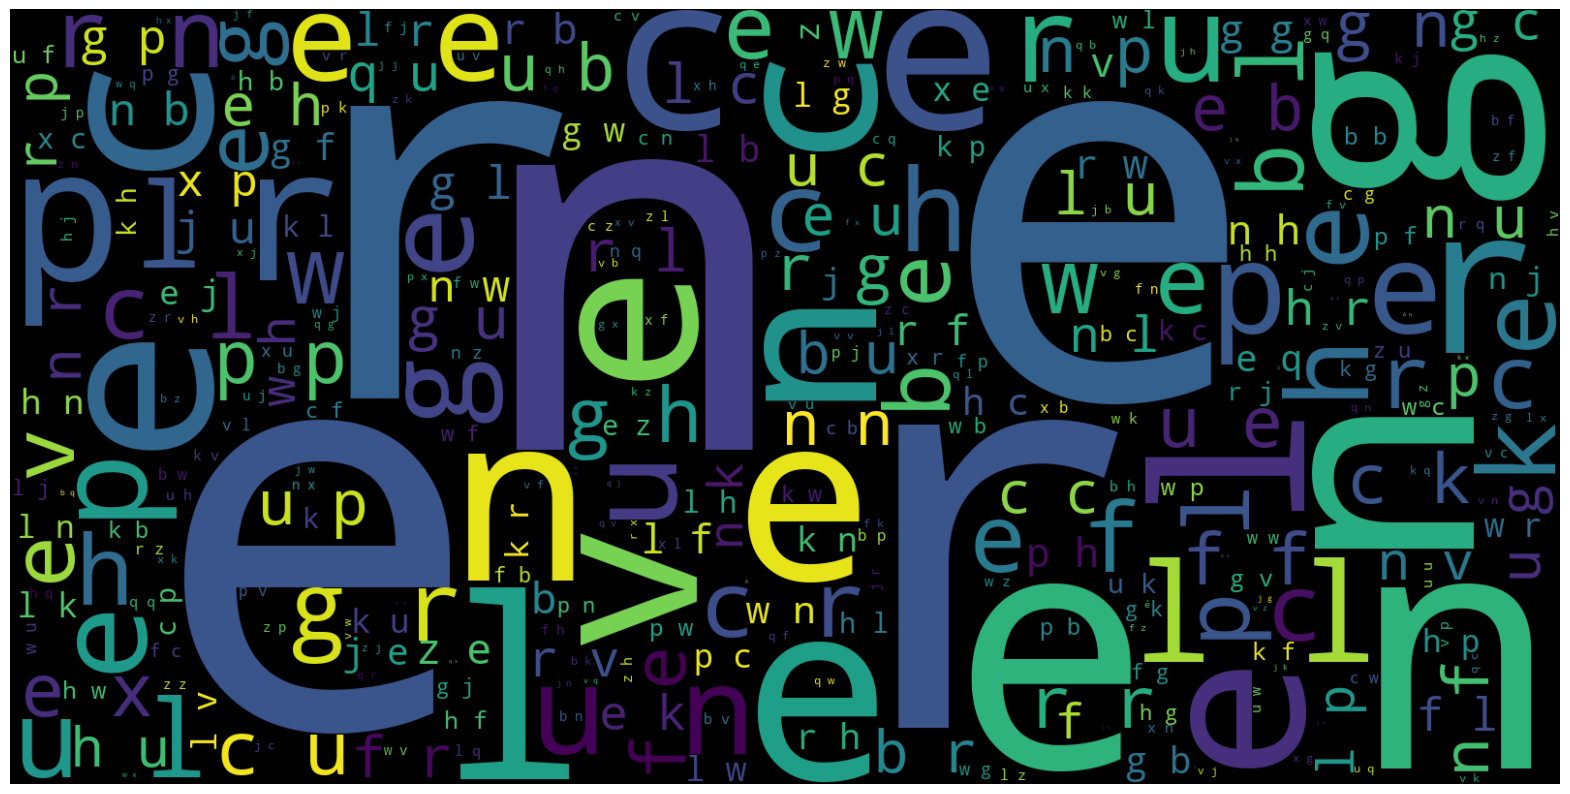

In [39]:
# Plot 4: Word cloud for text that is 'Real'
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(' '.join(df[df.isfake == 0].clean_joined.astype(str)))
plt.imshow(np.array(wc.to_image()), interpolation="bilinear")
plt.axis("off")

In [40]:
# Obtain the total words present in the dataset
list_of_words = []

for i in df.clean_text:
    for j in i:
        list_of_words.append(j)

In [41]:
len(list_of_words)

68227166

In [42]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))

In [43]:
total_words

74

In [44]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
# Tokenize
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

# Convert to sequences
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq  = tokenizer.texts_to_sequences(X_test)

# define max length
# Setting the maximum sequence length to 300 tokens.
max_len = 300

# Add Padding
padded_train = pad_sequences(train_seq, maxlen=max_len, padding="post")
padded_test  = pad_sequences(test_seq,  maxlen=max_len, padding="post")

# Buliding the model

In [45]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(
    Embedding(
        input_dim=total_words,
        output_dim=128,
        input_length=max_len
    )
)

model.add(SpatialDropout1D(0.3))

# Bi-Directional RNN and LSTM
model.add(
    Bidirectional(
        LSTM(64, return_sequences=True)
    )
)

model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [46]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [47]:
# Adding early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

In [48]:
history = model.fit(
    padded_train,
    y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/15
880/880 [==============================] - 151s 169ms/step - loss: 0.4337 - accuracy: 0.7747 - val_loss: 0.2915 - val_accuracy: 0.8673
Epoch 2/15
880/880 [==============================] - 159s 181ms/step - loss: 0.2890 - accuracy: 0.8670 - val_loss: 0.2469 - val_accuracy: 0.8939
Epoch 3/15
880/880 [==============================] - 155s 176ms/step - loss: 0.2310 - accuracy: 0.9006 - val_loss: 0.1791 - val_accuracy: 0.9217
Epoch 4/15
880/880 [==============================] - 154s 175ms/step - loss: 0.1876 - accuracy: 0.9228 - val_loss: 0.1526 - val_accuracy: 0.9377
Epoch 5/15
880/880 [==============================] - 153s 174ms/step - loss: 0.1569 - accuracy: 0.9368 - val_loss: 0.1407 - val_accuracy: 0.9428
Epoch 6/15
880/880 [==============================] - 153s 174ms/step - loss: 0.1399 - accuracy: 0.9453 - val_loss: 0.1227 - val_accuracy: 0.9514
Epoch 7/15
880/880 [==============================] - 153s 174ms/step - loss: 0.1252 - accuracy: 0.9505 - val_loss: 0.1253 -

In [49]:
# The model outputs probabilities using a sigmoid activation.
# Applying a threshold of 0.5 to convert probabilities into binary class labels
y_pred_prob = model.predict(padded_test)
y_pred = (y_pred_prob > 0.5).astype(int)

245/245 [==============================] - 12s 46ms/step


In [50]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.9563882849469242


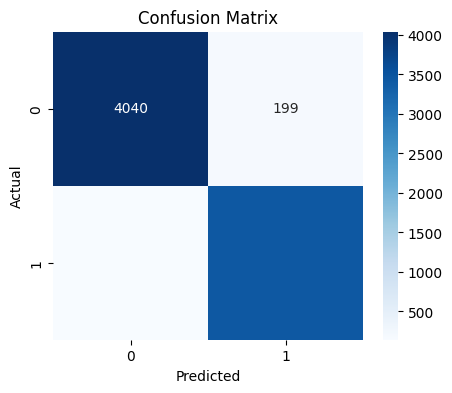

In [51]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4239
           1       0.95      0.96      0.95      3580

    accuracy                           0.96      7819
   macro avg       0.96      0.96      0.96      7819
weighted avg       0.96      0.96      0.96      7819



## What we can interpret from the classification report:

In [64]:
# Sanity-check
idx = random.randint(0, len(X_test)-1) # Randomly selecting one news article from the test set.

print("TEXT:")
print(X_test.iloc[idx][:500])

print("\nTRUE LABEL:", y_test.iloc[idx]) # Shows Target/Label
print("PRED PROB:", float(y_pred_prob[idx])) # Probability of being fake

TEXT:
u n   r u s s i a   s l a m s   i n q u i r y   t o x i c   g a s   a t t a c k s   s y r i a   u n i t e d   n a t i o n s   r u s s i a   r e j e c t e d   t u e s d a y   i n t e r n a t i o n a l   i n q u i r y   b l a m i n g   s y r i a n   g o v e r n m e n t   d e a d l y   t o x i c   g a s   a t t a c k   c a s t i n g   d o u b t   w h e t h e r   u n   s e c u r i t y   c o u n c i l   a g r e e   e x t e n d   i n v e s t i g a t i o n   m a n d a t e   e x p i r e s   n e x t   w 

TRUE LABEL: 0
PRED PROB: 0.009685334749519825


In [55]:
sample_text = "The government announced new infrastructure projects today."

seq = tokenizer.texts_to_sequences([sample_text])
pad = pad_sequences(seq, maxlen=max_len)

prob = model.predict(pad)[0][0]
print("Fake probability:", prob)

1/1 [==============================] - 0s 44ms/step
Fake probability: 0.98754776


## What we can interpret from the sanity check:

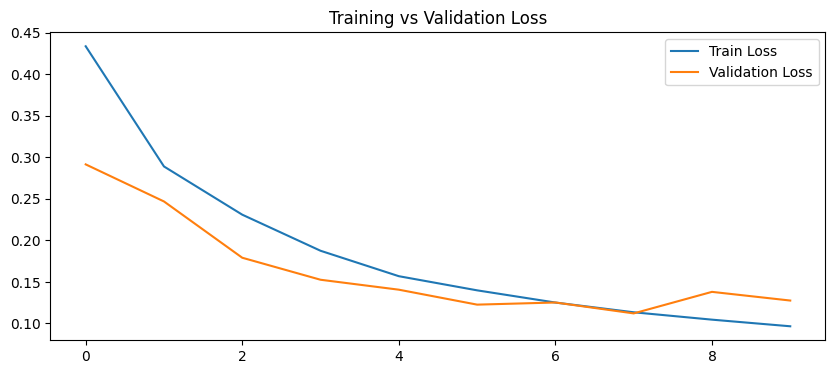

In [56]:
# Plot 5: Training vs Validation Loss
plt.figure(figsize=(10,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

## What we can interpret from Plot 5:

## Observation (Plot 5):

After removing dataset bias and leakage, the training and validation loss curves show healthy convergence. The slight rise in validation loss indicates the onset of overfitting, which is handled using early stopping.

# Model Limitations

Model does not verify factual correctness

Learns linguistic patterns only

Performance depends on dataset source distribution

Not suitable for real-time fact verification

# Conclusion

This project demonstrates the application of NLP and deep learning techniques for fake news classification while highlighting real-world challenges such as dataset bias and data leakage.

# Deployment

In [57]:
# save model
model.save("fake_news_model.h5")

# save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
